In [2]:
# Define constants
workbook_name = 'Publishing sites test.xlsx'
worksheet_name = 'Framework Overview'
framework_column = 'Framework'
score_columns = ['Flexibility', 'Learning curve 1', 'Learning curve 2', 'Learning curve 3', 'Learning curve 4']

In [3]:
import pandas as pd
import openpyxl

df = pd.read_excel(workbook_name, sheet_name=worksheet_name, usecols=[framework_column])

workbook = openpyxl.load_workbook(workbook_name)
worksheet = workbook[worksheet_name]
# Create mapping between header names (first row cells) and column indices
headers = {c.value: c.column-1 for c in next(worksheet.iter_rows(min_row=1, max_row=1))}

# Loop through the rows in the column flexibility and fill column flexibility_score based on the color coding.
for idx, row in enumerate(worksheet.iter_rows(min_row=2)):
    for score_column in score_columns:
        cell = row[headers[score_column]]
        if cell.style == "Bad":
            df.at[idx, score_column] = 0
        elif cell.style == "Neutral":
            df.at[idx, score_column] = 10 
        elif cell.style == "Good":
            df.at[idx, score_column] = 20
    
workbook.close()
df['Learning curve average'] = df[score_columns[1:]].mean(axis=1)

In [4]:
df.head()

,Framework,Flexibility,Learning curve 1,Learning curve 2,Learning curve 3,Learning curve 4,Learning curve average
0,Hugo,20.0,10.0,10.0,10.0,10.0,10.0
1,Native | HTML + JS + CSS,20.0,0.0,0.0,0.0,0.0,0.0
2,GitHub Repository,10.0,10.0,10.0,20.0,10.0,12.5
3,Jekyll,20.0,10.0,10.0,10.0,20.0,12.5
4,WordPress,20.0,20.0,20.0,10.0,10.0,15.0


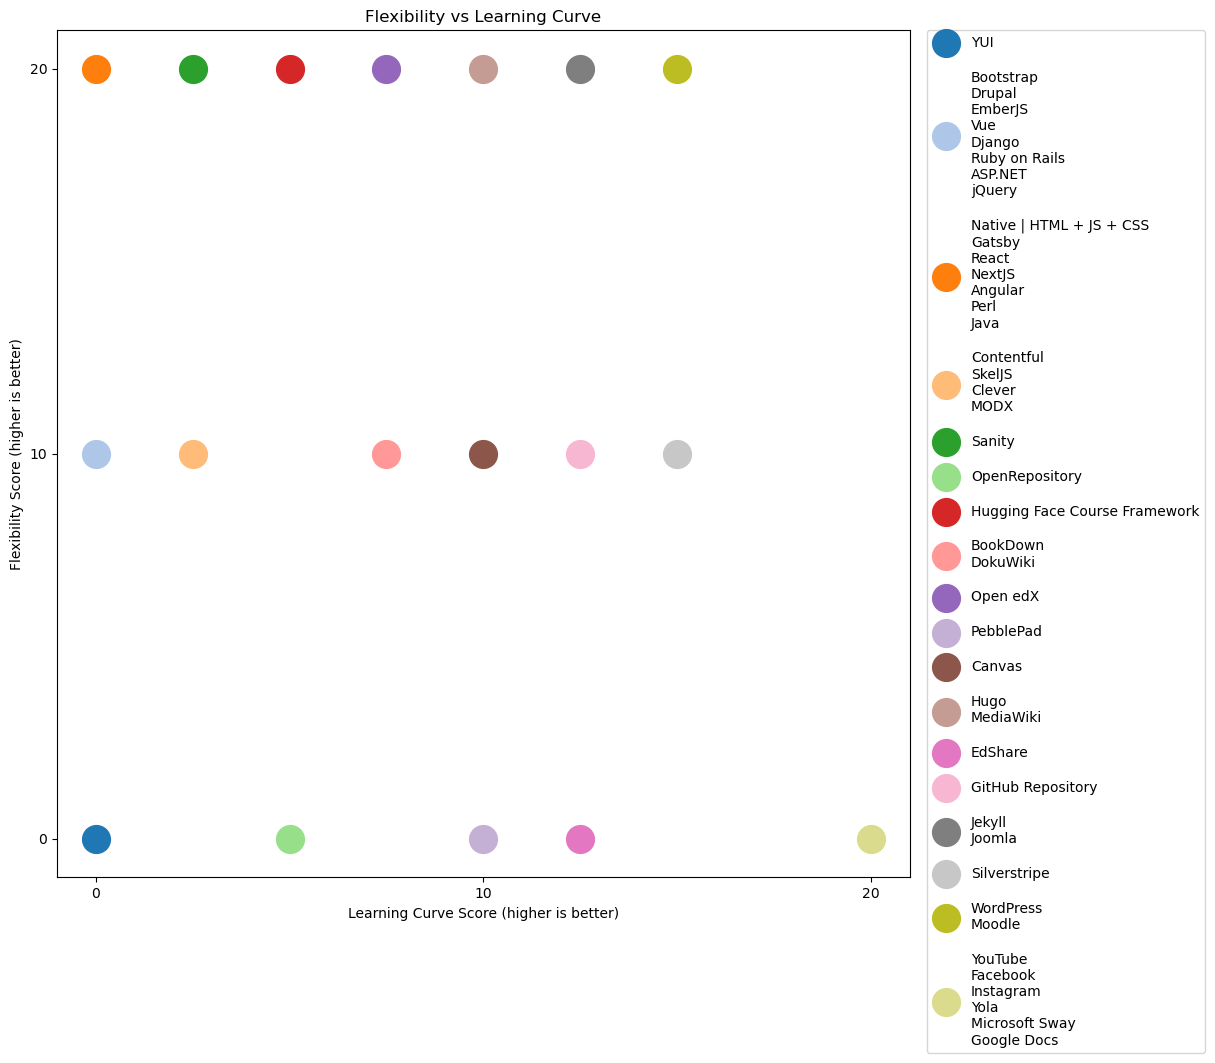

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a larger color palette
colors = sns.color_palette('tab20', n_colors=20)

# Group the data by the x,y coordinates
grouped = df.groupby(['Learning curve average', 'Flexibility'])

# Create a new figure
fig, ax = plt.subplots(figsize=(11, 11))

# Iterate over the groups and plot the points
for i, (name, group) in enumerate(grouped):
    x, y = name
    label = '\n'.join(group[framework_column])
    ax.scatter(x, y, label=label, s= 400, color=colors[i])

# Set the axis labels and title
ax.set_xlabel('Learning Curve Score (higher is better)')
ax.set_ylabel('Flexibility Score (higher is better)')
ax.set_title('Flexibility vs Learning Curve')

# Set the tick marks
listOf_Xticks = np.arange(0, 21, 10)
ax.set_xticks(listOf_Xticks)
listOf_Yticks = np.arange(0, 21, 10)
ax.set_yticks(listOf_Yticks)

# Add a legend
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labelspacing = 1.5)

# Show the plot
plt.show()